## Optimizing Runtime in Deep Learning Using Early Stopping and Learning Rate Schedulers

In [11]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:10000].astype('float32') / 255.0
y_train = y_train[:10000]
x_test = x_test[:2000].astype('float32') / 255.0
y_test = y_test[:2000]
# reshape for CNN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [19]:
def create_model():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_history(history, model_num):
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {model_num} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {model_num} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [15]:
model1 = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history1 = model1.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/20
250/250 - 4s - 15ms/step - accuracy: 0.8679 - loss: 0.4496 - val_accuracy: 0.9215 - val_loss: 0.2774
Epoch 2/20
250/250 - 2s - 7ms/step - accuracy: 0.9485 - loss: 0.1793 - val_accuracy: 0.9335 - val_loss: 0.2260
Epoch 3/20
250/250 - 2s - 6ms/step - accuracy: 0.9688 - loss: 0.1105 - val_accuracy: 0.9525 - val_loss: 0.1674
Epoch 4/20
250/250 - 2s - 6ms/step - accuracy: 0.9795 - loss: 0.0734 - val_accuracy: 0.9545 - val_loss: 0.1510
Epoch 5/20
250/250 - 2s - 7ms/step - accuracy: 0.9856 - loss: 0.0498 - val_accuracy: 0.9500 - val_loss: 0.1593
Epoch 6/20
250/250 - 2s - 6ms/step - accuracy: 0.9920 - loss: 0.0327 - val_accuracy: 0.9580 - val_loss: 0.1390
Epoch 7/20
250/250 - 2s - 6ms/step - accuracy: 0.9959 - loss: 0.0226 - val_accuracy: 0.9630 - val_loss: 0.1324
Epoch 8/20
250/250 - 2s - 7ms/step - accuracy: 0.9975 - loss: 0.0148 - val_accuracy: 0.9625 - val_loss: 0.1340
Epoch 9/20
250/250 - 2s - 7ms/step - accuracy: 0.9979 - loss: 0.0099 - val_accuracy: 0.9630 - val_loss: 0.1419


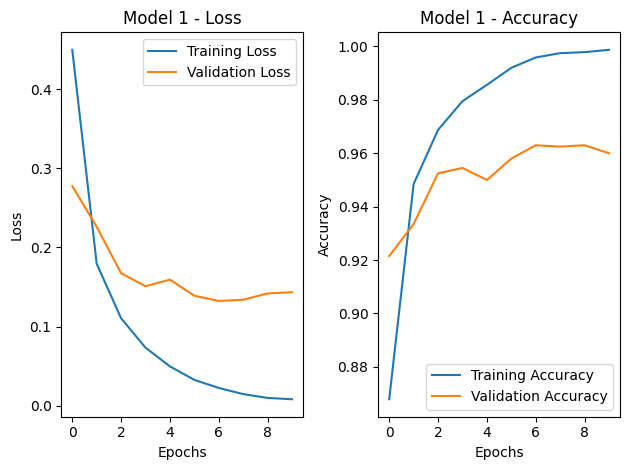

In [20]:
plot_history(history1, 1)

In [18]:
model2 = create_model()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
history2 = model2.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

Epoch 1/20
250/250 - 3s - 11ms/step - accuracy: 0.8650 - loss: 0.4692 - val_accuracy: 0.9165 - val_loss: 0.2891 - learning_rate: 0.0010
Epoch 2/20
250/250 - 2s - 7ms/step - accuracy: 0.9485 - loss: 0.1822 - val_accuracy: 0.9410 - val_loss: 0.1927 - learning_rate: 0.0010
Epoch 3/20
250/250 - 2s - 7ms/step - accuracy: 0.9691 - loss: 0.1094 - val_accuracy: 0.9490 - val_loss: 0.1595 - learning_rate: 0.0010


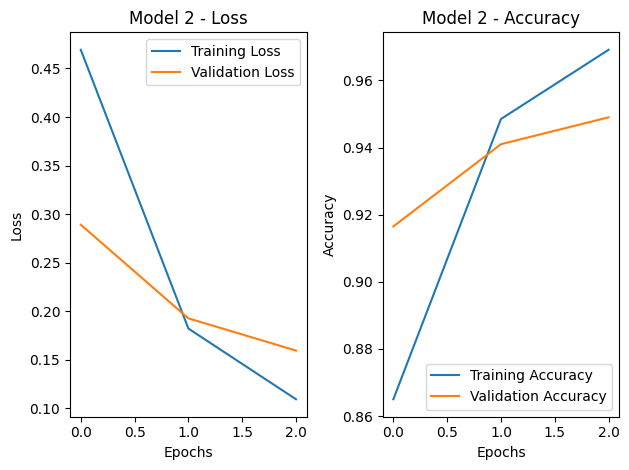

In [21]:
plot_history(history2, 2)

In [22]:
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

model3 = create_model()
step_scheduler = LearningRateScheduler(step_decay)
history3 = model3.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping, step_scheduler],
    verbose=2
)

Epoch 1/20
250/250 - 3s - 13ms/step - accuracy: 0.8773 - loss: 0.4447 - val_accuracy: 0.9185 - val_loss: 0.2930 - learning_rate: 0.0010
Epoch 2/20
250/250 - 2s - 6ms/step - accuracy: 0.9564 - loss: 0.1554 - val_accuracy: 0.9450 - val_loss: 0.1827 - learning_rate: 0.0010
Epoch 3/20
250/250 - 2s - 7ms/step - accuracy: 0.9726 - loss: 0.0932 - val_accuracy: 0.9565 - val_loss: 0.1497 - learning_rate: 0.0010


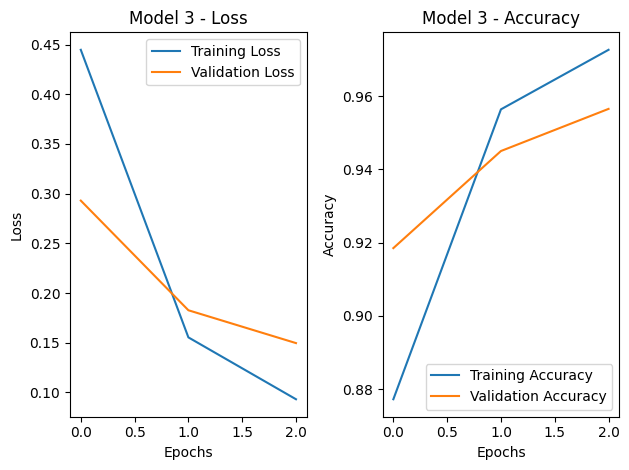

In [23]:
plot_history(history3, 3)

In [24]:
### exponential Decay ###
def exp_decay(epoch):
    initial_lr = 0.001
    k = 0.1
    lr = initial_lr * np.exp(-k * epoch)
    return lr

model4 = create_model()
exp_scheduler = LearningRateScheduler(exp_decay)
history4 = model4.fit(
    x_train, y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping, exp_scheduler],
    verbose=2
)

Epoch 1/20
250/250 - 3s - 12ms/step - accuracy: 0.8575 - loss: 0.4820 - val_accuracy: 0.9230 - val_loss: 0.2838 - learning_rate: 0.0010
Epoch 2/20
250/250 - 2s - 6ms/step - accuracy: 0.9501 - loss: 0.1725 - val_accuracy: 0.9455 - val_loss: 0.1931 - learning_rate: 9.0484e-04
Epoch 3/20
250/250 - 3s - 11ms/step - accuracy: 0.9700 - loss: 0.1034 - val_accuracy: 0.9465 - val_loss: 0.1874 - learning_rate: 8.1873e-04


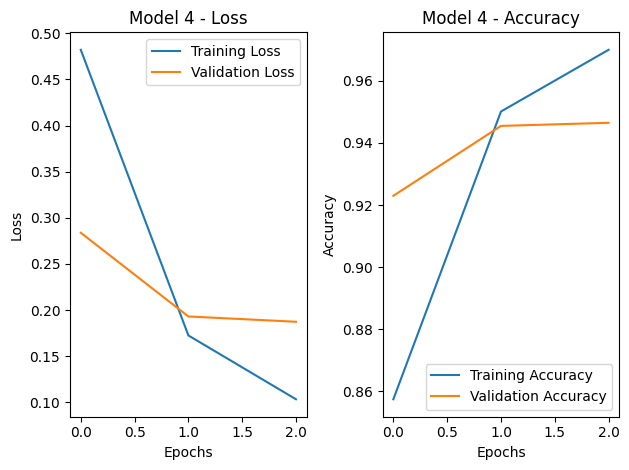

In [25]:
plot_history(history4, 4)

In [26]:
for i, model in enumerate([model1, model2, model3, model4], start=1):
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Model {i} - Test Accuracy: {acc:.4f}")

Model 1 - Test Accuracy: 0.9550
Model 2 - Test Accuracy: 0.9105
Model 3 - Test Accuracy: 0.9090
Model 4 - Test Accuracy: 0.9090
